# DEF FUNCTIONS

Import librerie utili e funzioni create

In [60]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def sigmoid(z) :
  g = 1 / (1+np.exp(-1*z));
  return g

def costFunction(X, y, theta, var_lambda) :
  m = y.size
  h = sigmoid(np.dot(X, theta))
  cost = -y * np.log(h) - (1-y) * np.log(1-h)
  thetaNoZeros = np.copy(theta)
  thetaNoZeros[0] = 0
  J = (1 / m) * sum(cost) + var_lambda/(2*m)*sum(thetaNoZeros**2)
  grad = (1/m) * np.dot(np.transpose(X), (h-y))
  return J

def gradientDescent(X, y, theta, alpha, num_iters, var_lambda) :
  m = y.size
  J_history = np.zeros(num_iters)
  for iter in range(num_iters) :
    h = sigmoid(np.dot(X, theta))
    theta =  theta*(1-alpha*var_lambda/m) - (alpha/m)*np.dot(np.transpose(X), (h-y))
    J_history[iter] = costFunction(X, y, theta, var_lambda)
  return theta, J_history

def featureNormalize(X) :  
  X_norm = X
  mu = X.mean(0)
  sigma = X.std(0)
  r,c = X.shape
  i = 1
  for i in range(c) :
    X_norm[:, i] = ((X[:,i] - mu[i]) / sigma[i]);
  return X_norm, mu, sigma

# IMPORT DATASET

Dataset scelto: TITANIC

In [61]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gianluca-Di-Stefano/Homework-Sistemi-Intelligenti/main/Homework1/titanicTrain.csv')
X = df.iloc[:, 1:4]
y = df["Survived"]
m,n = X.shape
print("Dataset importato")


Dataset importato


# PLOT DATA

Prima classe:  186
Seconda classe:  173
Terza classe:  355


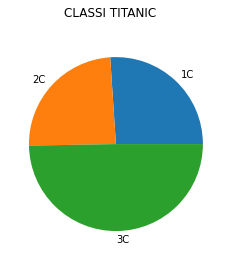

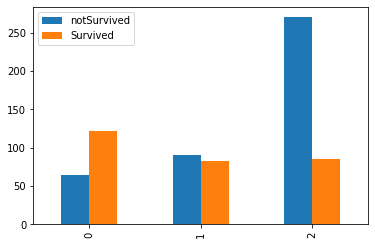

In [62]:
import matplotlib.pyplot as plt

classColumn = X.loc[:, ["Pclass"]]
num_firstClass = int((classColumn[classColumn["Pclass"] == 1]).count())
num_SecondClass = int((classColumn[classColumn["Pclass"] == 2]).count())
num_thirdClass = int((classColumn[classColumn["Pclass"] == 3]).count())
print("Prima classe: ", num_firstClass)
print("Seconda classe: ", num_SecondClass)
print("Terza classe: ", num_thirdClass)
plt.pie([num_firstClass, num_SecondClass, num_thirdClass], labels=["1C", "2C", "3C"])
plt.suptitle('CLASSI TITANIC')
plt.show()
survived = df[df["Survived"]==1].groupby(["Pclass"])["Survived"].count().reset_index();
survived['notSurvived'] = df[df["Survived"]==0].groupby(["Pclass"])["Survived"].count().reset_index().Survived;
survived[['notSurvived','Survived']].plot.bar()

# FEATURES GENERATION (OPZIONALE)

Sezione in cui si possono creare nuove features da aggiungere a quelle già presenti

# FEATURES NORMALIZING

In [63]:
X_numpy = X.to_numpy(dtype=float)
#ESEMPI PER LE PREDICTIONS
esempi = np.array([[1, 0, 30], [2, 0, 30], [3, 0, 30], [1, 1, 30], [2, 1, 30], [3, 1, 30], [3, 0, 10], [3, 0, 20], [3, 0, 80]], dtype=float);
X_numpy, mu, sigma = featureNormalize(X_numpy)
esempi_numpy, mu, sigma = featureNormalize(esempi)
X_numpy = np.insert(X_numpy,0,1, axis=1)
esempi_numpy = np.insert(esempi_numpy,0,1, axis=1)
m,n = X_numpy.shape
y_numpy = y.to_numpy(dtype=float)
print("Normalizzazione features...")

Normalizzazione features...


# LEARNING PARAMETERS

In [64]:
alpha = 0.007
iterations = 5000
#var_lambda = 0, NO REGOLARIZZAZIONE
var_lambda = 0
theta_init = np.zeros(n)
print("Parametri di learning scelti:")
print("Alpha: ", alpha)
print("Iterazioni: ", iterations)
print("Lambda: ", var_lambda)

Parametri di learning scelti:
Alpha:  0.007
Iterazioni:  5000
Lambda:  0


# TEST CODE WITH CONVERGENCE GRAPH

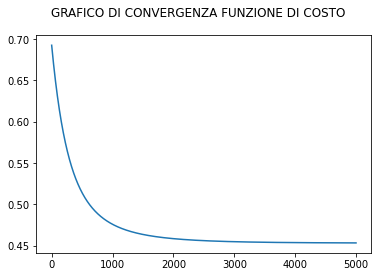

array([0.69236765, 0.69159113, 0.6908176 , ..., 0.45349602, 0.45349581,
       0.4534956 ])

In [65]:
theta, J_history = gradientDescent(X_numpy, y_numpy, theta_init, alpha, iterations, var_lambda)
iterations_history = np.arange(iterations);
plt.plot(iterations_history, J_history);
plt.suptitle('GRAFICO DI CONVERGENZA FUNZIONE DI COSTO')
plt.show()
J_history



# PREDICTIONS

In [66]:
predictions = np.round(sigmoid(np.dot(esempi_numpy, theta)));

for i in range(predictions.size) :
  print("-----------------------------------")
  print("Prediction esempio ", i, " : ", predictions[i])

-----------------------------------
Prediction esempio  0  :  1.0
-----------------------------------
Prediction esempio  1  :  0.0
-----------------------------------
Prediction esempio  2  :  0.0
-----------------------------------
Prediction esempio  3  :  1.0
-----------------------------------
Prediction esempio  4  :  1.0
-----------------------------------
Prediction esempio  5  :  1.0
-----------------------------------
Prediction esempio  6  :  0.0
-----------------------------------
Prediction esempio  7  :  0.0
-----------------------------------
Prediction esempio  8  :  0.0
